# Binary Classification models for iris dataset

## Logistic Regression

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



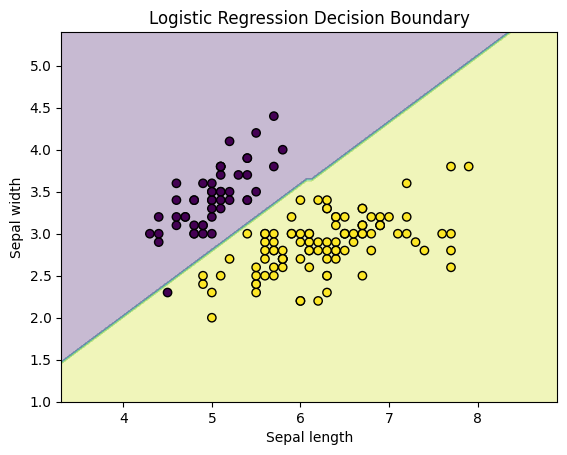

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for visualization
y = (iris.target != 0).astype(int)  # Binary classification: Setosa (0) vs Non-Setosa (1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

"""
1) fit_transform() on training data:
    fit() computes the mean and standard deviation from the training set.
    transform() applies this scaling to standardize the training data.

2) transform() on test data (NOT fit_transform)

    We apply the same scaling (computed from training data) to the test set to maintain consistency.

3) For labels (y), we do not scale because they are categorical/class values, not continuous numerical features. 🚀
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# params
params = {'penalty': 'l2',          # Regularization type ('l1' or 'l2')
            'C': 1.0,                 # Inverse of regularization strength
            'solver': 'liblinear',    # Solver for optimization
            'max_iter': 200}

# Train a Logistic Regression model
model_lr = LogisticRegression(**params)
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model_lr.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Logistic Regression Decision Boundary")
plt.show()


In [3]:
# Get the report dict in a dictionary format
"""
We will use these metrics to log them in MLFlow
"""
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 30.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 30.0}}

### MLFlow section

In [4]:
import mlflow
mlflow.set_experiment("Logistic with Iris")
"""
The uri or url here is the one we get after running "mlfow ui". So the mlflow ui should be 
running while we upload the metrics.
"""
mlflow.set_tracking_uri("http://127.0.0.1:5000")

"""
We will log parameters, metrics and model
"""
with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_macro': report_dict['macro avg']['f1-score']
    })
    mlflow.sklearn.log_model(model_lr, "Logistic Regression") # mlflow doesnt directly have model log function. Therefore using sklearn.

RestException: RESOURCE_DOES_NOT_EXIST: Could not find experiment with ID 537645849267404452

In [7]:
import mlflow
mlflow.set_experiment("Logistic with Iris-duplicate")
"""
The uri or url here is the one we get after running "mlfow ui". So the mlflow ui should be 
running while we upload the metrics.
"""
mlflow.set_tracking_uri("http://127.0.0.1:5000")

"""
We will log parameters, metrics and model
"""
with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_macro': report_dict['macro avg']['f1-score']
    })
    mlflow.sklearn.log_model(model_lr, "Logistic Regression") # mlflow doesnt directly have model log function. Therefore using sklearn.

2025/07/10 16:27:07 INFO mlflow.tracking.fluent: Experiment with name 'Logistic with Iris-duplicate' does not exist. Creating a new experiment.
2025/07/10 16:27:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run amusing-colt-985 at: http://127.0.0.1:5000/#/experiments/471506682627355635/runs/7bbd800ef57f417fa6abcfda111e9a76
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/471506682627355635


# Run multiple models

In [5]:
# Random Forest

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import xgboost as xgb

# Load Iris dataset
data = load_wine()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Random Forest hyperparameters in a dictionary
params_lr = {
    'penalty': 'l2',          # Regularization type ('l1' or 'l2')
    'C': 1.0,                 # Inverse of regularization strength
    'solver': 'liblinear',    # Solver for optimization
    'max_iter': 200
}

params_rf = {
    'n_estimators': 100,
    'max_depth': 5,
    'random_state': 42,
    'max_features': 'sqrt',
    'min_samples_split': 2
}

params_svm = {
    'C': 1.0,
    'kernel': 'rbf',  # Radial Basis Function kernel
    'gamma': 'scale',
    'random_state': 42
}

params_xgb = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': 3,                # Number of classes in the dataset
    'max_depth': 6,                # Maximum depth of the tree
    'learning_rate': 0.1,          # Step size shrinkage
    'n_estimators': 100,           # Number of boosting rounds
    'eval_metric': 'mlogloss',     # Multi-class log loss
}

# Initialize Random Forest model with parameters
model_lr = LogisticRegression(**params_lr)
model_rf = RandomForestClassifier(**params_rf)
model_svm = SVC(**params_svm)
model_xgb = xgb.XGBClassifier(**params_xgb)

# Train the model
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_svm.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)


# Get classification report
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)


In [6]:
import mlflow
model_names_ = ["Logistic Regression", "Random Forest", "SVM", "xgboost"]
params_name = [params_lr, params_rf, params_svm, params_xgb]
report_dict_list = [report_lr, report_rf, report_svm, report_xgb]
models_ = [model_lr, model_rf, model_svm, model_xgb]

mlflow.set_experiment("Multiple Classification Models")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

for i, model_n in enumerate(model_names_):

    with mlflow.start_run(run_name=model_n):
        mlflow.log_params(params_name[i])
        mlflow.log_metrics({
            'accuracy': report_dict_list[i]['accuracy'],
            'recall_class_0': report_dict_list[i]['0']['recall'],
            'recall_class_1': report_dict_list[i]['1']['recall'],
            'f1_macro': report_dict_list[i]['macro avg']['f1-score']
        })
        if model_n == "xgboost":
            mlflow.xgboost.log_model(models_[i], model_n) # mlflow doesnt directly have model log function. Therefore using xgboost.
        else:
            mlflow.sklearn.log_model(models_[i], model_n) # mlflow doesnt directly have model log function. Therefore using sklearn.

2025/07/09 19:00:55 INFO mlflow.tracking.fluent: Experiment with name 'Multiple Classification Models' does not exist. Creating a new experiment.


2025/07/09 19:00:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/480922811531264080/runs/826fcf92fe2a4a7e9ff5ec04dd2a080e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/480922811531264080


2025/07/09 19:01:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/480922811531264080/runs/69b6fc37758d4b389a128e13ac5a7df6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/480922811531264080


2025/07/09 19:01:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/home/pushkar/.pyenv/versions/learn_mlflow/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:01:05] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


🏃 View run SVM at: http://127.0.0.1:5000/#/experiments/480922811531264080/runs/dd5c8fbc51ca4daabdcf9b5d524ae64b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/480922811531264080


2025/07/09 19:01:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run xgboost at: http://127.0.0.1:5000/#/experiments/480922811531264080/runs/5e6b43c0bb7b47458899b5bf1a40d559
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/480922811531264080


In [9]:
import mlflow
model_names_ = ["Logistic Regression", "Random Forest", "SVM", "xgboost"]
params_name = [params_lr, params_rf, params_svm, params_xgb]
report_dict_list = [report_lr, report_rf, report_svm, report_xgb]
models_ = [model_lr, model_rf, model_svm, model_xgb]

mlflow.set_experiment("Multiple Classification Models - duplicate")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

for i, model_n in enumerate(model_names_):

    with mlflow.start_run(run_name=model_n):
        mlflow.log_params(params_name[i])
        mlflow.log_metrics({
            'accuracy': report_dict_list[i]['accuracy'],
            'recall_class_0': report_dict_list[i]['0']['recall'],
            'recall_class_1': report_dict_list[i]['1']['recall'],
            'f1_macro': report_dict_list[i]['macro avg']['f1-score']
        })
        if model_n == "xgboost":
            mlflow.xgboost.log_model(models_[i], model_n) # mlflow doesnt directly have model log function. Therefore using xgboost.
        else:
            mlflow.sklearn.log_model(models_[i], model_n) # mlflow doesnt directly have model log function. Therefore using sklearn.

2025/07/10 16:27:51 INFO mlflow.tracking.fluent: Experiment with name 'Multiple Classification Models - duplicate' does not exist. Creating a new experiment.


2025/07/10 16:27:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/451070335349633589/runs/782a2b18f7004356afc340b843d7f63a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/451070335349633589


2025/07/10 16:27:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/451070335349633589/runs/7c9e5a22f41541a69729be6d44385dc9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/451070335349633589


2025/07/10 16:28:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/home/pushkar/.pyenv/versions/learn_mlflow/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:28:03] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


🏃 View run SVM at: http://127.0.0.1:5000/#/experiments/451070335349633589/runs/4a4d1705ac124f909e36063f109f25d4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/451070335349633589


2025/07/10 16:28:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run xgboost at: http://127.0.0.1:5000/#/experiments/451070335349633589/runs/4d0edfad9d074b8ea9046011a7a1556a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/451070335349633589


## Register the Model

In [12]:
import mlflow

model_name = "XGBoost"  # The name you want to assign in the Model Registry
artifact_path = "xgboost"  # This must match the artifact path used in log_model
run_id = input("Please type RunID: ")

model_uri = f"runs:/{run_id}/{artifact_path}"
mlflow.register_model(model_uri=model_uri, name=model_name)

Registered model 'XGBoost' already exists. Creating a new version of this model...
2025/07/10 16:54:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost, version 1
Created version '1' of model 'XGBoost'.


<ModelVersion: aliases=[], creation_timestamp=1752184441599, current_stage='None', description='', last_updated_timestamp=1752184441599, name='XGBoost', run_id='5e6b43c0bb7b47458899b5bf1a40d559', run_link='', source='mlflow-artifacts:/480922811531264080/5e6b43c0bb7b47458899b5bf1a40d559/artifacts/xgboost', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [13]:
# This will create a second version of the model
import mlflow

model_name = "XGBoost"  # The name you want to assign in the Model Registry
artifact_path = "xgboost"  # This must match the artifact path used in log_model
run_id = input("Please type RunID: ")

model_uri = f"runs:/{run_id}/{artifact_path}"
mlflow.register_model(model_uri=model_uri, name=model_name)

Registered model 'XGBoost' already exists. Creating a new version of this model...
2025/07/10 16:57:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost, version 2
Created version '2' of model 'XGBoost'.


<ModelVersion: aliases=[], creation_timestamp=1752184652868, current_stage='None', description='', last_updated_timestamp=1752184652868, name='XGBoost', run_id='5e6b43c0bb7b47458899b5bf1a40d559', run_link='', source='mlflow-artifacts:/480922811531264080/5e6b43c0bb7b47458899b5bf1a40d559/artifacts/xgboost', status='READY', status_message=None, tags={}, user_id='', version='2'>

In [6]:
# This will create a second version of the model
import mlflow

model_name = "XGBoost"  # The name you want to assign in the Model Registry
artifact_path = "xgboost"  # This must match the artifact path used in log_model
run_id = input("Please type RunID: ")

model_uri = f"runs:/{run_id}/{artifact_path}"
mlflow.register_model(model_uri=model_uri, name=model_name)

Registered model 'XGBoost' already exists. Creating a new version of this model...
2025/07/11 13:35:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost, version 3
Created version '3' of model 'XGBoost'.


<ModelVersion: aliases=[], creation_timestamp=1752258938067, current_stage='None', description='', last_updated_timestamp=1752258938067, name='XGBoost', run_id='5e6b43c0bb7b47458899b5bf1a40d559', run_link='', source='mlflow-artifacts:/480922811531264080/5e6b43c0bb7b47458899b5bf1a40d559/artifacts/xgboost', status='READY', status_message=None, tags={}, user_id='', version='3'>

## Load the model

In [ ]:
# Load the model

model_version = 1
model_uri = f"models:/{model_name}/{model_version}"

loaded_model = mlflow.xgboost.load_model(model_uri)
y_pred = loaded_model.predict(X_test)
y_pred[:4]



array([0, 0, 2, 0], dtype=int32)

## Use the model in production

In [ ]:
current_model_uri = f"models:/{model_name}@challenger"
production_model_name = "anomaly-detection-prod"

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)


Successfully registered model 'anomaly-detection-prod'.
Copied version '1' of model 'XGBoost' to version '1' of model 'anomaly-detection-prod'.


<ModelVersion: aliases=[], creation_timestamp=1752184963238, current_stage='None', description='Model registration trial', last_updated_timestamp=1752184963238, name='anomaly-detection-prod', run_id='5e6b43c0bb7b47458899b5bf1a40d559', run_link='', source='models:/XGBoost/1', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [21]:

model_version = 1
prod_model_uri = f"models:/{production_model_name}@challenger"

loaded_model = mlflow.xgboost.load_model(prod_model_uri)
y_pred = loaded_model.predict(X_test)
y_pred[:4]



array([0, 0, 2, 0], dtype=int32)

### Another Production Model

In [7]:
model_name

'XGBoost'

In [8]:
current_model_uri = f"models:/{model_name}@champion"
production_model_name = "Fraud_Detection-1"

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)


Successfully registered model 'Fraud_Detection-1'.
Copied version '3' of model 'XGBoost' to version '1' of model 'Fraud_Detection-1'.


<ModelVersion: aliases=[], creation_timestamp=1752260640748, current_stage='None', description='', last_updated_timestamp=1752260640748, name='Fraud_Detection-1', run_id='5e6b43c0bb7b47458899b5bf1a40d559', run_link='', source='models:/XGBoost/3', status='READY', status_message=None, tags={}, user_id='', version='1'>